In [40]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Load dataset

In [41]:
import pickle
ball_data = pickle.load(open('ball_data.pkl', 'rb'))
match_data = pickle.load(open('match_data.pkl', 'rb'))

In [42]:
df=pd.merge(ball_data, match_data, on='match_id', how='inner')

In [43]:
df['current_score'] = df.groupby(['match_id', 'innings'])['runs_batter'].cumsum() + df.groupby(['match_id', 'innings'])['runs_extras'].cumsum()

In [44]:
first_innings = df[df['innings'] == '1st innings']

# Get total runs scored in first innings for each match
first_innings_total = first_innings.groupby('match_id')['current_score'].max().reset_index()
first_innings_total['target'] = first_innings_total['current_score'] + 1

# Display the target for each match
# Merge the target column back to the main dataframe
df = df.merge(first_innings_total[['match_id', 'target']], on='match_id', how='left')
df.head()

,match_id,innings,ball,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,...,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,current_score,target
0,1000887,1st innings,0.1,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],0,269
1,1000887,1st innings,0.2,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],0,269
2,1000887,1st innings,0.3,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],0,269
3,1000887,1st innings,0.4,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],0,269
4,1000887,1st innings,0.5,Australia,DA Warner,TM Head,Mohammad Amir,0,1,1,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],1,269


In [45]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == None else 1)

In [46]:
## making wickets left using player_dismissed column
df['player_dismissed'] = df['player_dismissed'].astype('int')
df

,match_id,innings,ball,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,...,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,current_score,target
0,1000887,1st innings,0.1,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],0,269
1,1000887,1st innings,0.2,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],0,269
2,1000887,1st innings,0.3,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],0,269
3,1000887,1st innings,0.4,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],0,269
4,1000887,1st innings,0.5,Australia,DA Warner,TM Head,Mohammad Amir,0,1,1,...,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],1,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327861,997995,2nd innings,46.6,Scotland,PL Mommsen,RD Berrington,Mohammad Shahzad (2),0,0,0,...,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,225,229
1327862,997995,2nd innings,47.1,Scotland,RD Berrington,PL Mommsen,Rohan Mustafa,0,0,0,...,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,225,229
1327863,997995,2nd innings,47.2,Scotland,RD Berrington,PL Mommsen,Rohan Mustafa,0,0,0,...,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,225,229
1327864,997995,2nd innings,47.3,Scotland,RD Berrington,PL Mommsen,Rohan Mustafa,0,0,0,...,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,225,229


In [47]:
# 1. Calculate cumulative wickets fallen per match and innings
wickets_fallen = df.groupby(['match_id','innings'])['player_dismissed'].cumsum()

# 2. Subtract that from 10 to get actual wickets remaining
df['wickets_left'] = 10 - wickets_fallen

# 3. Check a sample (you will now see values like 10, 8, 5, etc.)
print(df['wickets_left'].unique())

[10  9  8  7  6  5  4  3  2  1  0 -1]


In [48]:
teams= [
    "India", "Sri Lanka", "Afghanistan", "Australia", 
    "Bangladesh", "England", "South Africa",
    "West Indies", "New Zealand", "Pakistan", 
    "Netherlands",  "Zimbabwe"
]

In [49]:
df = df[df['team1'].isin(teams)]
df = df[df['team2'].isin(teams)]


In [50]:
## Using Numpy to use first word of stadium as city
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [51]:
df['city'] = cities

In [52]:
city=sorted(df['city'].unique().tolist())

In [53]:
team=sorted(df['team1'].unique().tolist())


In [54]:
df['over'] = df['ball'].astype(str).str.split('.').str[0].astype(int)
df['ball_in_over'] = df['ball'].astype(str).str.split('.').str[1].astype(int)


In [55]:
df['balls_bowled'] = (df['over'] * 6) + df['ball_in_over']

df['balls_remaining'] = 300- df['balls_bowled']

df['crr'] = np.where(df['balls_bowled'] > 0, (df['current_score'] * 6) / df['balls_bowled'], 0)
df['rr'] = np.where(df['balls_remaining'] > 0, ((df['target'] - df['current_score']) * 6) / df['balls_remaining'], 0)

df['crr'].replace([np.inf, -np.inf], 0, inplace=True)
df['rr'].replace([np.inf, -np.inf], 0, inplace=True)

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_20752\3051345812.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['crr'].replace([np.inf, -np.inf], 0, inplace=True)
C:\Users\Pulkit\AppData\Local\Temp\ipykernel_20752\3051345812.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [56]:
df['winner_flag'] = np.where(df['winner'] == df['batting_team'], 1, 0)

In [57]:
df['runs_left'] = df['target'] - df['current_score']

In [58]:
# Calculate runs and wickets in the last 10 overs for each row
def last_10_over_stats(group):
    group = group.sort_values('ball')
    group['runs_last_10'] = group['runs_batter'].rolling(window=60, min_periods=60).sum()
    group['wickets_last_10'] = group['wicket_type'].notnull().rolling(window=60, min_periods=1).sum()
    return group

df = df.groupby(['match_id', 'innings'], group_keys=False).apply(last_10_over_stats)

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_20752\784669986.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['match_id', 'innings'], group_keys=False).apply(last_10_over_stats)


In [59]:
df['bowling_team'] = np.where(df['batting_team'] == df['team1'], df['team2'], df['team1'])

<Figure size 1200x600 with 0 Axes>

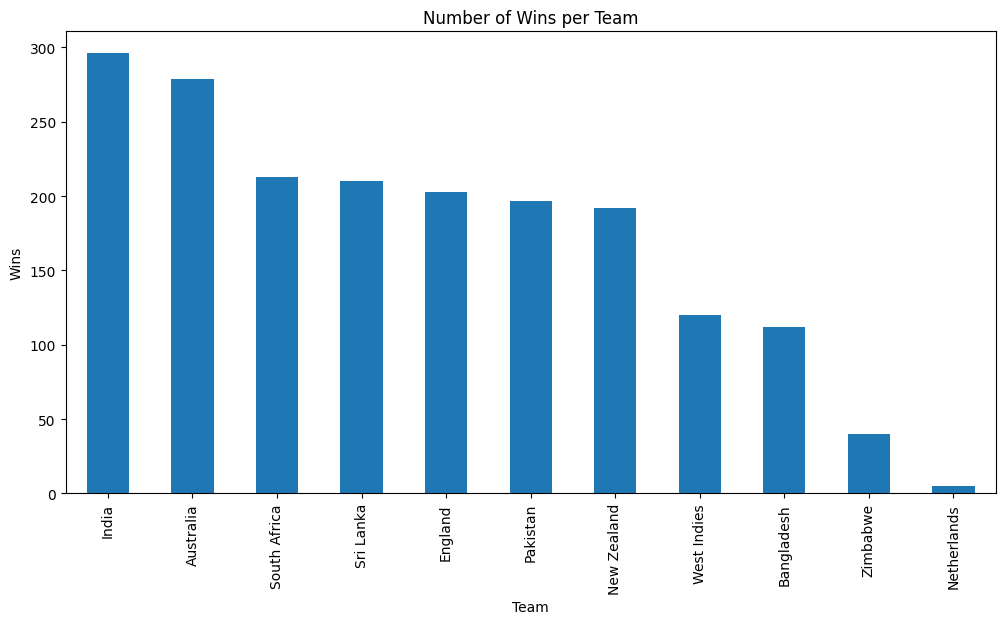

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
# Visualizing the count of wins for each team
plt.figure(figsize=(12,6))
df.drop_duplicates(subset=['match_id'])['winner'].value_counts().plot(kind='bar')
plt.title('Number of Wins per Team')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()

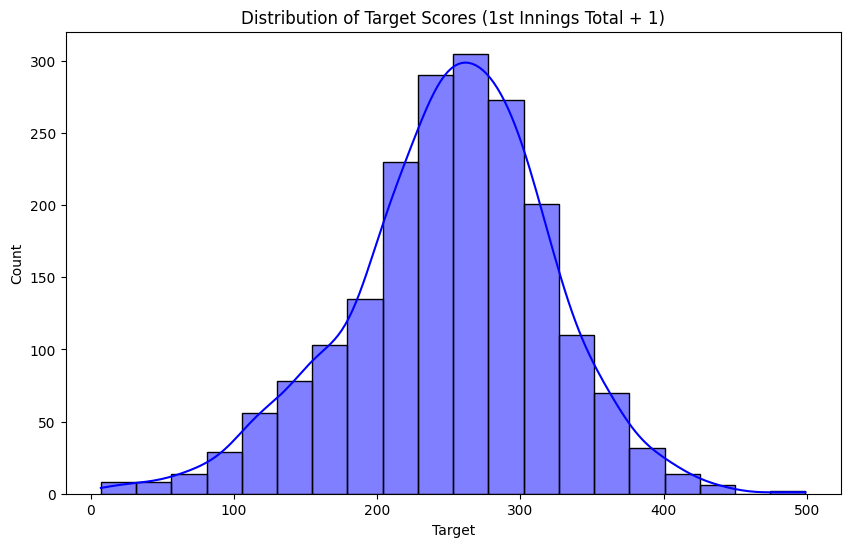

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(df.drop_duplicates(subset=['match_id'])['target'], bins=20, kde=True, color='blue')
plt.title('Distribution of Target Scores (1st Innings Total + 1)')
plt.xlabel('Target')
plt.show()

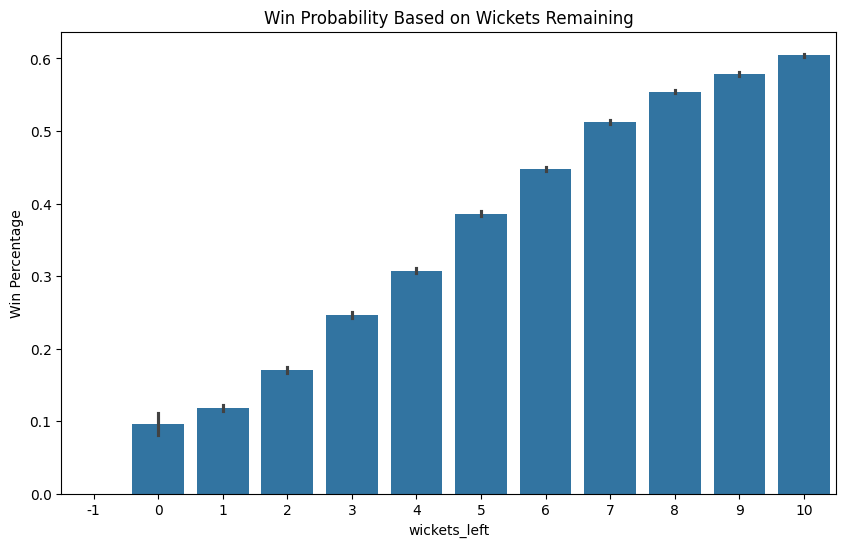

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x='wickets_left', y='winner_flag', data=df)
plt.title('Win Probability Based on Wickets Remaining')
plt.ylabel('Win Percentage')
plt.show()

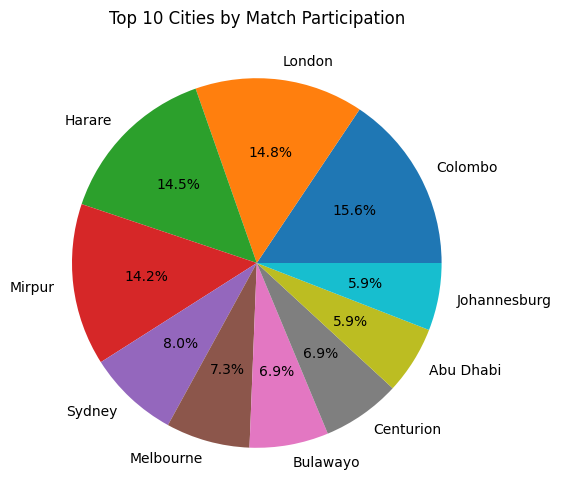

In [63]:
plt.figure(figsize=(12,6))
df['city'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Cities by Match Participation')
plt.ylabel('')
plt.show()

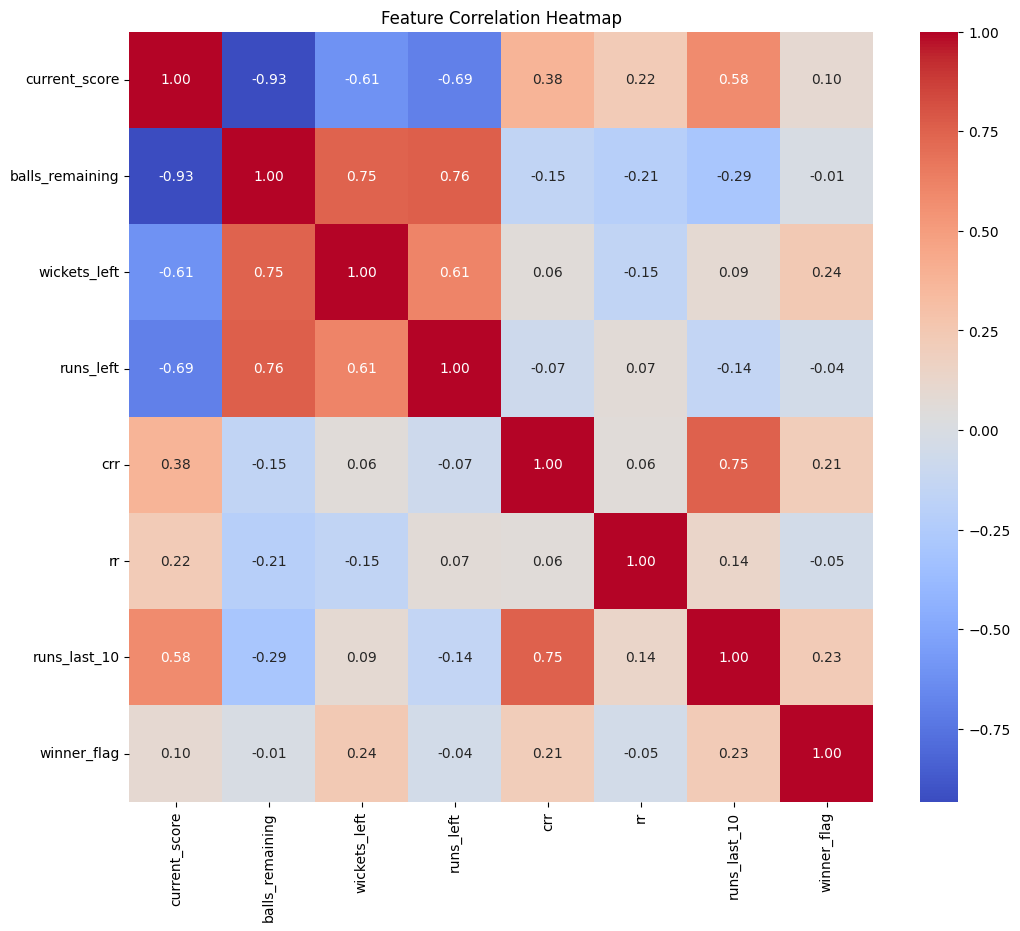

In [64]:
plt.figure(figsize=(12,10))
numeric_df = df[['current_score', 'balls_remaining', 'wickets_left', 'runs_left', 'crr', 'rr', 'runs_last_10', 'winner_flag']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

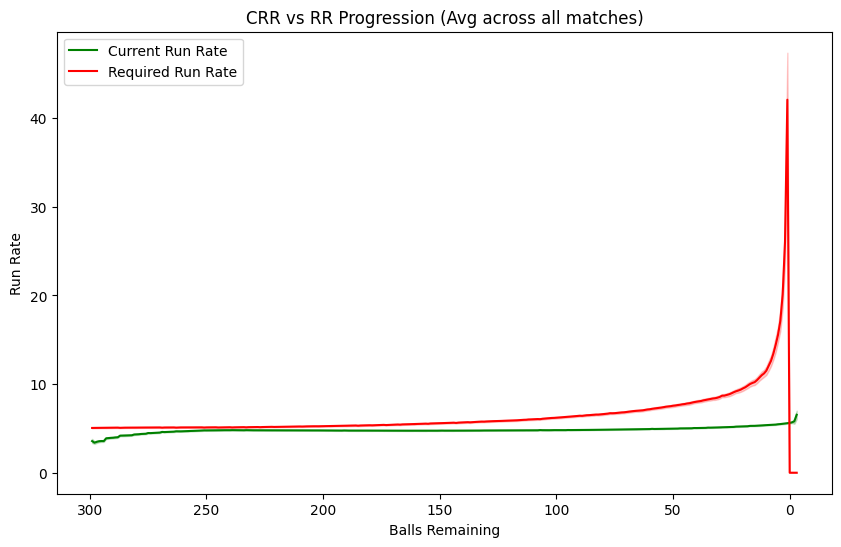

In [65]:
plt.figure(figsize=(10,6))
sns.lineplot(x='balls_remaining', y='crr', data=df, label='Current Run Rate', color='green')
sns.lineplot(x='balls_remaining', y='rr', data=df, label='Required Run Rate', color='red')
plt.gca().invert_xaxis() # Show progression from 300 balls down to 0
plt.title('CRR vs RR Progression (Avg across all matches)')
plt.xlabel('Balls Remaining')
plt.ylabel('Run Rate')
plt.legend()
plt.show()

In [66]:
df = df[df['innings'] == '2nd innings']
features = ['batting_team','bowling_team','current_score','balls_remaining', 'wickets_left','runs_left','crr', 'rr', 'runs_last_10', 'wickets_last_10']

In [67]:
df['winner_flag'].isnull().sum()

np.int64(0)

In [68]:
df.shape

(479151, 36)

In [69]:
df.isnull().sum()

match_id                 0
innings                  0
ball                     0
batting_team             0
batter                   0
non_striker              0
bowler                   0
runs_batter              0
runs_extras              0
runs_total               0
extras_type         460372
wicket_type         466404
player_dismissed         0
team1                    0
team2                    0
venue                    0
city                     0
dates                    0
winner                7034
by_runs             241697
by_wickets          244488
player_of_match       2627
current_score            0
target                   0
wickets_left             0
over                     0
ball_in_over             0
balls_bowled             0
balls_remaining          0
crr                      0
rr                       0
winner_flag              0
runs_left                0
runs_last_10        112327
wickets_last_10          0
bowling_team             0
dtype: int64

In [70]:
df=df.dropna(subset=['runs_last_10','wickets_last_10'])

In [71]:
df.isnull().sum()

match_id                 0
innings                  0
ball                     0
batting_team             0
batter                   0
non_striker              0
bowler                   0
runs_batter              0
runs_extras              0
runs_total               0
extras_type         353643
wicket_type         356720
player_dismissed         0
team1                    0
team2                    0
venue                    0
city                     0
dates                    0
winner                4799
by_runs             182942
by_wickets          188681
player_of_match       1261
current_score            0
target                   0
wickets_left             0
over                     0
ball_in_over             0
balls_bowled             0
balls_remaining          0
crr                      0
rr                       0
winner_flag              0
runs_left                0
runs_last_10             0
wickets_last_10          0
bowling_team             0
dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
X=df[features]
y=df['winner_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

trf = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['batting_team', 'bowling_team']),
    ('num', StandardScaler(), ['current_score', 'balls_remaining', 'wickets_left', 'runs_left', 'crr', 'rr', 'runs_last_10', 'wickets_last_10'])
])

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, fbeta_score

# Create pipeline with preprocessing and logistic regression
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])

# Define hyperparameter grid for tuning
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

print(f"Accuracy: {accuracy:.4f}")
print(f"F2 Score: {f2:.4f}")

Accuracy: 0.8526
F2 Score: 0.8494


--- Model Metrics ---
Accuracy: 0.8526
F1 Score: 0.8504
ROC AUC Score: 0.9343
Precision-Recall AUC (Avg Precision): 0.9336

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     37145
           1       0.85      0.85      0.85     36220

    accuracy                           0.85     73365
   macro avg       0.85      0.85      0.85     73365
weighted avg       0.85      0.85      0.85     73365



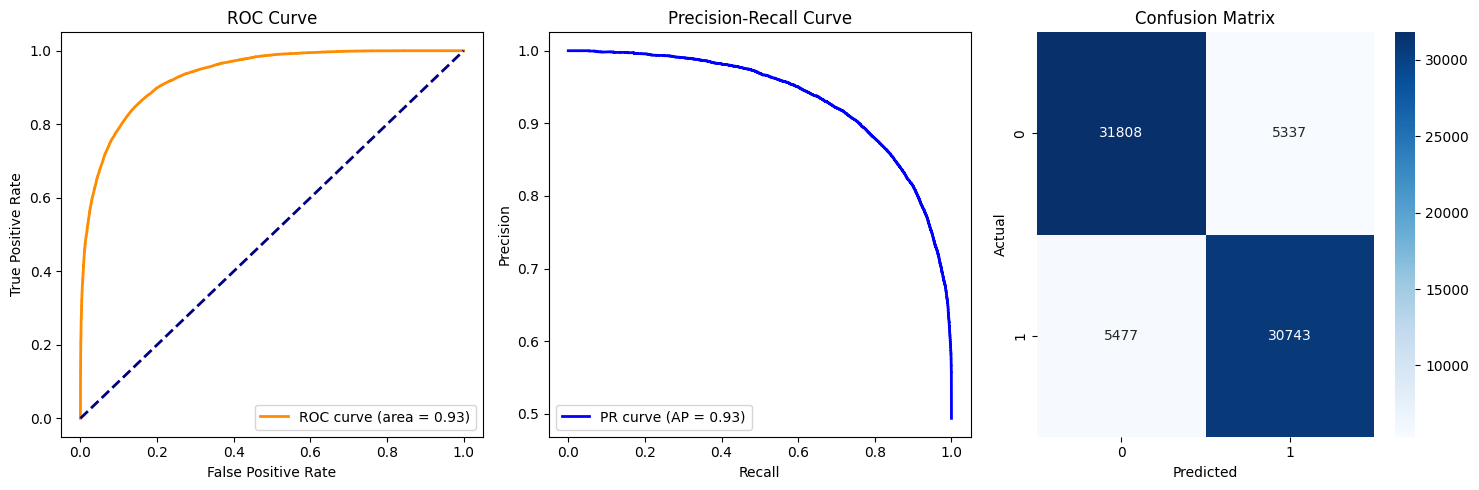

In [74]:
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             average_precision_score, accuracy_score, 
                             f1_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get Predictions
# predict_proba returns [prob_loss, prob_win]. We take index 1 for Win Probability.
y_probs = pipe.predict_proba(X_test)[:, 1] 
y_pred = pipe.predict(X_test)

# 2. Calculate Essential Scores
roc_auc = roc_auc_score(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"--- Model Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC (Avg Precision): {avg_precision:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Plotting the Curves
plt.figure(figsize=(15, 5))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

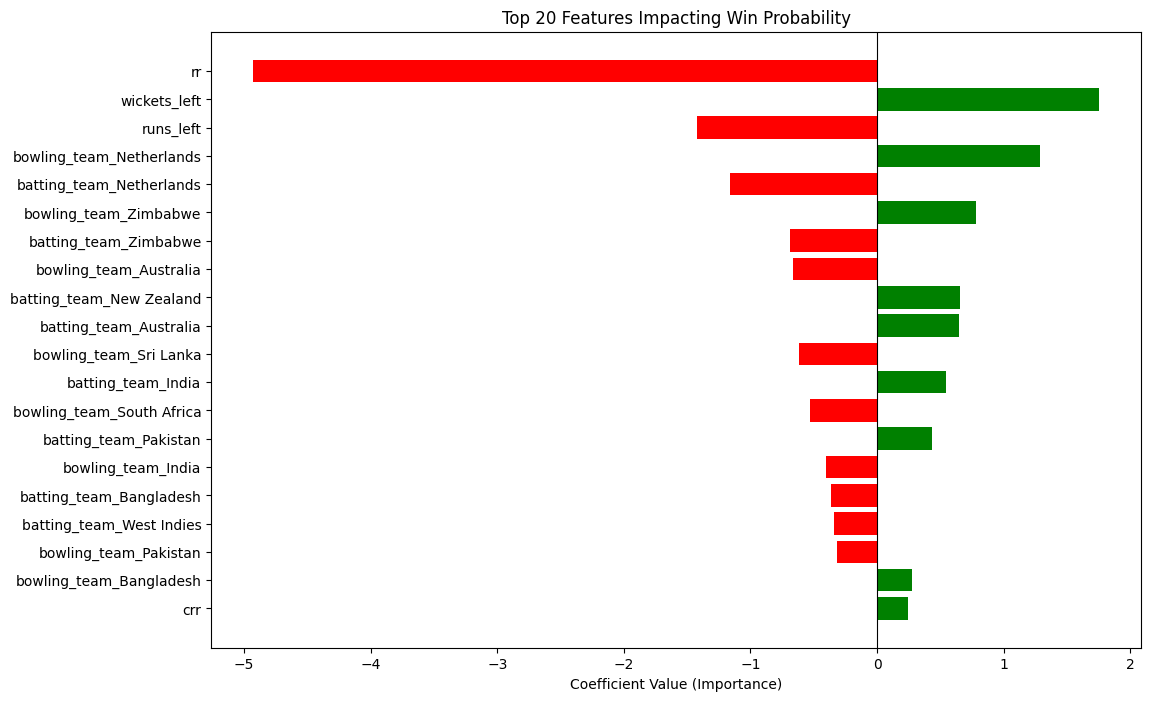

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Extract feature names from the OneHotEncoder (Categorical)
# Based on your 'cat' transformer in win.ipynb
ohe_feature_names = pipe.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['batting_team', 'bowling_team'])

# 2. Define numerical feature names in the EXACT order they appear in your ColumnTransformer
num_feature_names = ['current_score', 'balls_remaining', 'wickets_left', 'runs_left', 'crr', 'rr', 'runs_last_10', 'wickets_last_']

# 3. Combine all feature names
all_feature_names = np.concatenate([ohe_feature_names, num_feature_names])

# 4. Get the coefficients from the trained Logistic Regression model
# Logistic Regression coefficients represent importance (positive/negative impact)
coefs = pipe.named_steps['classifier'].coef_[0]

# 5. Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': coefs
})

# 6. Sort by absolute importance to see the top 20 most influential factors
feature_importance['abs_importance'] = feature_importance['Importance'].abs()
top_20_features = feature_importance.sort_values(by='abs_importance', ascending=False).head(20)

# 7. Plotting the graph
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in top_20_features['Importance']]
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color=colors)
plt.xlabel('Coefficient Value (Importance)')
plt.title('Top 20 Features Impacting Win Probability')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.gca().invert_yaxis()  # Put most important at the top
plt.show()

In [76]:
import pickle
# Export the pipeline
pickle.dump(pipe, open('pipe_odi_second_innings.pkl', 'wb'))

# Ensure team and city lists are saved (you have cells for this, but double check)
pickle.dump(team, open('team_odi_second_innings.pkl', 'wb'))
pickle.dump(city, open('city_odi_second_innings.pkl', 'wb'))